In [1]:
# CAP 6619, X. Zhu, updated Sept 20 2020
# Single Perceptron: Gradient Descent Learning and Delta Learnnig Rule
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
class1 = pd.read_csv("class1.txt")
class2 = pd.read_csv("class2.txt")
print(class1.shape)
print(class2.shape)
class1.head()

(100, 2)
(100, 2)


,weight,height
0,0.132,0.757
1,0.722,0.888
2,0.095,0.804
3,0.633,0.530
4,0.472,0.701


In [2]:
# add lables to the data. .insert() will directly modify the dataframe
class1.insert(class1.shape[1],'label',1)
class2.insert(class2.shape[1],'label',0)
# combine both datasets as one
class12 = class1.append(class2)
print(class12.shape)
class12.head()

(200, 3)


,weight,height,label
0,0.132,0.757,1
1,0.722,0.888,1
2,0.095,0.804,1
3,0.633,0.530,1
4,0.472,0.701,1


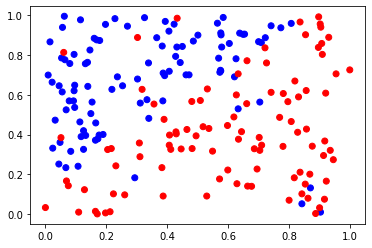

In [3]:
colors=["red","blue"]
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]])
# The dataset is not a linearly searable problem.
# So we will use gradient descent learning to learn decision boundary

In [4]:
# partitioning the dataset into training vs. test sets
# shuffle the data
class12_rand=shuffle(class12)
features,labels=class12_rand.iloc[:,0:-1],class12_rand.loc[:,['label']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=.4, random_state=42)
# covert data from dataframe into matrix format for arithemetic calculation
X_train_m=np.asmatrix(X_train, dtype = 'float64')
X_test_m=np.asmatrix(X_test, dtype = 'float64')
y_train_m=np.asmatrix(y_train, dtype = 'float64')
y_test_m=np.asmatrix(y_test, dtype = 'float64')

In [5]:
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels,threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    totalSquaredErr_ = []
    totalSquaredErrTest_ = []
    accuracy_= []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            diff = learning_rate*(labels[i] - v)
            deltaw=deltaw+diff*x
        #update weights
        #print(deltaw)
        w=w+deltaw
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]
        totalSquaredErr_.append(err)
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(test_labels[i] - v)*(test_labels[i] - v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
        # now calculate test classification accuracy
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            if((v>=threshold and test_labels[i]==0) or (v<threshold and test_labels[i]==1)):
                this_err=this_err+1
        this_err=float(this_err)
        this_err=this_err/test_features.shape[0]
        accuracy_.append(1-this_err)
        #next epoch
        epoch=epoch+1
    return (w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)



In [6]:
# we use maximum 500 iterations. Because gradient descent leanring weight updating is accumulated across all
# training instances. We use set learning rate as inverse of # of training instances, to avoid weight values
# w continuosly increasing.
max_iter = 500
threshold=0.5
eta=1.0/X_train.shape[0]
#eta=0.02
print("Learning rate is: %.5f" % eta)
err_threshold=0.01
w, misclassified, testError, accuracy= GradientDescentLearning(X_train_m, y_train_m, max_iter, eta, err_threshold,X_test_m,y_test_m,threshold)
print(misclassified[0:10])
print(testError[0:10])
print(accuracy[0:10])

Learning rate is: 0.00833
[0.12442599261270731, 0.11627709406646995, 0.10988628198641062, 0.10460066243560741, 0.10013946593785122, 0.0963462292444987, 0.09311242756208932, 0.09035295492122265, 0.08799742983138585, 0.08598645512264452]
[0.13400357834369084, 0.115072641912673, 0.11182841108329589, 0.10253953892683973, 0.0982774331788116, 0.09269071771650264, 0.08898721998683032, 0.0852477119309887, 0.08236710660417233, 0.07973583289383254]
[0.4375, 0.675, 0.625, 0.7125, 0.7375, 0.7875, 0.8125, 0.8375, 0.8375, 0.85]


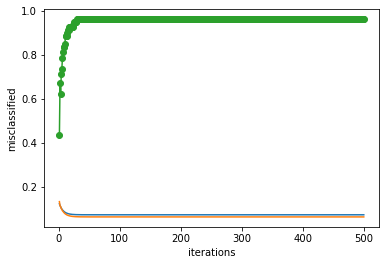

In [9]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.plot(epochs, testError)
plt.plot(epochs, accuracy,marker='o')
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

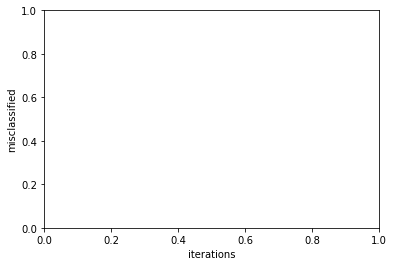

In [10]:
# Now we create a plot to show learned decision boundaries (find slope and intercept)
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=threshold/w[0,2]-w[0,0]/w[0,2]
print(slope,intercept)

[[ 0.40363563 -0.81365598  0.80727016]]
1.0079103934934834 0.11937065721705187


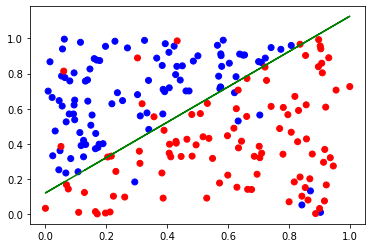

In [11]:
xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")

In [12]:
# now we implement Delta rule leanring. Which use a signle instance to update the network weight value
import random
def Delta(features, labels, max_iter, learning_rate, err_threshold,threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    totalSquaredErr_ = []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        # random select an instance
        i=random.randrange(features.shape[0])
        x=features[i,]
        x = np.insert(x,0,1)
        v = np.dot(w, x.transpose())
        diff = learning_rate*(labels[i] - v)
        deltaw=deltaw+diff*x
        #update weights
        #print(deltaw)
        w=w+deltaw
        # now calculate error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.asscalar(this_err)
        this_err=this_err/2.0
        totalSquaredErr_.append(this_err)
        #mean squared error
        err=this_err/features.shape[0]
        epoch=epoch+1
    return (w, totalSquaredErr_)

In [13]:
# we use maximum 500 iterations. Because delta rule only uses one instance to update,
# we set learning rate to a small value
max_iter = 500
eta=0.1
err_threshold=0.01
w, misclassified= Delta(X_train_m, y_train_m, max_iter, eta,err_threshold,threshold)
print(misclassified[0:10])

C:\Users\Gabor\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


[36.442286719153586, 25.501993839201223, 19.652310065328308, 19.745282210451347, 20.750429465840643, 17.455063071624902, 16.369252584630722, 16.147416758709234, 16.039763460895024, 16.161341137457693]


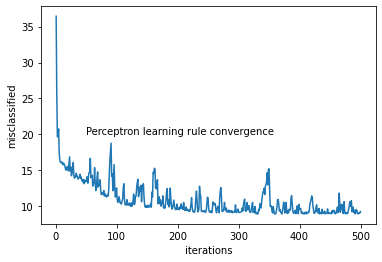

In [14]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.text(50,20,"Perceptron learning rule convergence")
plt.show()